<a href="https://colab.research.google.com/github/EleonoraBartolomucci/Fairness/blob/master/Esperimenti/graficoMelaPrimoEsperimento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

     restaurant  typology  ... review_sentiment  sort
0   TupeloHoney  American  ...         positive  yelp
0   TupeloHoney  American  ...         positive  date
1   TupeloHoney  American  ...          neutral  yelp
1   TupeloHoney  American  ...         positive  date
2   TupeloHoney  American  ...         negative  yelp
..          ...       ...  ...              ...   ...
36  TupeloHoney  American  ...         negative  yelp
37  TupeloHoney  American  ...         negative  date
37  TupeloHoney  American  ...         positive  yelp
38  TupeloHoney  American  ...         positive  yelp
38  TupeloHoney  American  ...         negative  date

[78 rows x 11 columns]


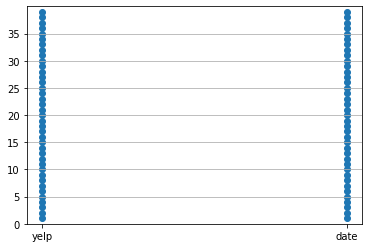

In [28]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from oauth2client.client import GoogleCredentials
from google.colab import auth
import json
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

sort = 'Relevance'

relevance = '1nwGbyk8q2S-0BkLcyFVqdK6emTooxHJv'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': relevance})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

df1 = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

sort = 'Date'

date = '1Pb2It9WPid9Irjp6bRVgCF7B3Y5ARBjT'  # FILE ID, got on google drive with condivision link
download = drive.CreateFile({'id': date})
download.GetContentFile('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

df2 = pd.read_csv('AllRestaurant_' + '%s' % sort + '_Analysis.csv')

#restaurant.plot(kind='bar',x='name',y='num_children',ax=ax)
#restaurant.groupby('ethnicity')['user_id'].nunique().plot(kind='bar')

#restaurant.assign(dummy = 1).groupby(['ethnicity','restaurant']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).to_frame().unstack().plot(kind='bar',stacked=True,legend=True)


#filtro il df prendendo solo le righe che mi interessano
df1 = df1[(df1['restaurant']=='TupeloHoney') & (df1['ethnicity']=='asian')]
#df1 = df1[(df1['restaurant']=='TupeloHoney')]
df2 = df2[(df2['restaurant']=='TupeloHoney')  & (df1['ethnicity']=='asian')]

df1['sort'] = 'yelp'
df2['sort'] ='date'
df = pd.concat([df1, df2])
df = df[(df['number']<40)]

df = df.sort_values('number')
print(df)
y1 = df['number'].tolist()
x1 = df['sort'].tolist()

#servono per mettere la griglia
axes = plt.gca()
axes.yaxis.grid()
#mi definisce i limiti della y
axes.set_ylim([1,40])

#scegliere dove mettere le etichette
plt.yticks(np.arange(0, 40, 5.0))

#plt.scatter(x1,y1)
plt.scatter(x1,y1, s=10, color='red', label='white')
plt.scatter(x2,y2, s=10, color='green', label='asian')
plt.scatter(x3,y3, s=10, color='blue', label='mexican')
plt.legend(loc="upper center")
plt.xlabel('Group id')
plt.ylabel('Exposure')
#plt.xlabel('etnia')

# disable ticks in the x axis
#plt.xticks([])

# fix the legend or it'll include the dummy variable
#current_handles, _ = plt.gca().get_legend_handles_labels()
#reversed_handles = reversed(current_handles)
#correct_labels = reversed(restaurant['restaurant'].unique())

#plt.legend(reversed_handles,correct_labels)

#plt.show()
